### Exercis 2 - Random forest for classification and regression   
a) Use random forest to classify the iris dataset and evaluate afterwards   

b) Use random forest to predict house prices for the dataset you used in exercise1   

In [3]:
import pandas as pd
from sklearn.datasets import load_iris

##### Steg 1 - ladda hem data och dela upp i X (features) och y (target)

In [4]:

df = load_iris(as_frame = True).frame 

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X, y = df.drop("target", axis = "columns"), df["target"]

X.head(), y.head()

(   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                5.1               3.5                1.4               0.2
 1                4.9               3.0                1.4               0.2
 2                4.7               3.2                1.3               0.2
 3                4.6               3.1                1.5               0.2
 4                5.0               3.6                1.4               0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

##### Steg 2 - Train/test-split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (120, 4)
X_test.shape = (30, 4)
y_train.shape = (120,)
y_test.shape = (30,)


##### Steg 3 - Träna en random forest
Viktiga parametrar att känna till i början:   

- n_estimators → antal träd (standard = 100, fler ger oftast stabilare resultat men tar längre tid).   

- max_depth → hur djupt varje träd får växa (kan begränsa komplexitet, annars växer träden tills de inte kan mer).   

- random_state → så vi kan reproducera samma resultat.   

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 100, #=> antal träd
    random_state=42
)

rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


##### Steg 4 - Utvärdera modellen 
- Prediktion och Accuracy
- Confusion matrix (för att se var felen blir)
- Classification report (precision/recall/F1)



In [12]:
#Prediktion och accuracy

from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score på test-setet: {acc:.3f}")

Accuracy score på test-setet: 1.000


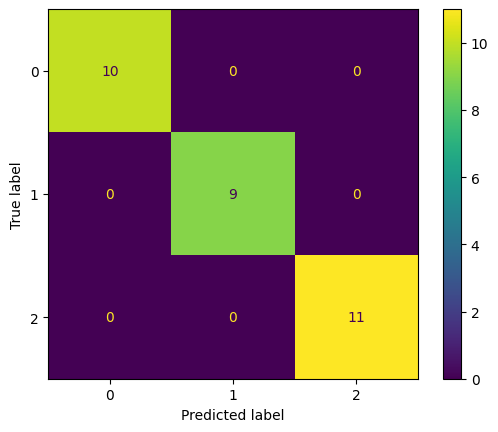

In [15]:
#Confussion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

